In [3]:
import os
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from pathlib import Path
import gc
from PIL import Image
from matplotlib import pyplot as plt
import time

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


In [4]:

base_data_dir = Path("/data")


In [5]:
!rm -fr unsloth_compiled_cache

In [6]:
model_mapper = {
  
      "Qwen2_5-3b_finetuned":str(base_data_dir / "models/qwen2_5_3b_outputs"),
      "Qwen2_5-7b_finetuned":str(base_data_dir / "models/qwen2_5_7b_outputs"),
      
      "Qwen2-vl-7b_finetuned":str(base_data_dir / "models/qwen2_VL_7b/lora_model"),
      "Qwen2_5-3b":"unsloth/Qwen2.5-VL-3B-Instruct",
      "Qwen2_5-7b":"unsloth/Qwen2.5-VL-7B-Instruct",
      "Qwen2-vl-7b":"unsloth/Qwen2-VL-7B-Instruct"   
}

In [7]:
SYSTEM_PROMPT = '''
Вы — ассистент OCR , который извлекает информацию с русских товарных этикеток на изображениях. В тексте могут встречаться названия на английском.
'''

USER_PROMPT = '''
Пожалуйста, извлеките весь текст на изображении и ничего больше без комментариев. 
'''

In [8]:
from qwen_processor import QwenProcessor
 

In [9]:
!pip show torch

Name: torch
Version: 2.7.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, bitsandbytes, cut-cross-entropy, peft, torchaudio, torchvision, unsloth, unsloth_zoo, xformers


In [10]:
!pip show unsloth

Name: unsloth
Version: 2025.4.7
Summary: 2-5X faster LLM finetuning
Home-page: http://www.unsloth.ai
Author: Unsloth AI team
Author-email: info@unsloth.ai
License-Expression: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: accelerate, bitsandbytes, datasets, diffusers, hf_transfer, huggingface_hub, numpy, packaging, peft, protobuf, psutil, sentencepiece, torch, torchvision, tqdm, transformers, triton, trl, tyro, unsloth_zoo, wheel, xformers
Required-by: 


In [11]:
qwen_processor = QwenProcessor()

In [12]:
qwen_processor.get_available_models()

dict_keys(['Qwen2_5-3b_finetuned', 'Qwen2_5-7b_finetuned', 'Qwen2-vl-7b_finetuned', 'Qwen2_5-3b', 'Qwen2_5-7b', 'Qwen2-vl-7b'])

In [46]:
img = Image.open(base_data_dir / "names" / "1.jpg")
#img = Image.open("IMG_20250213_094829.jpg")

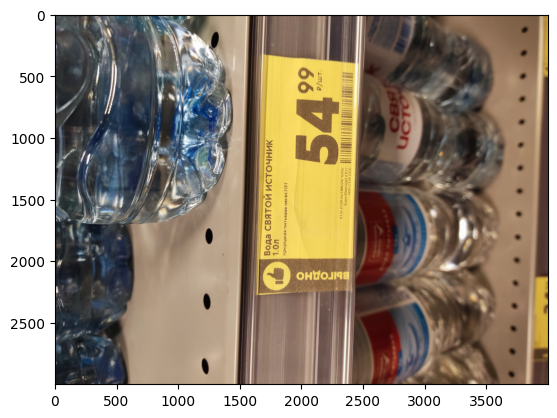

In [31]:
plt.imshow(img)

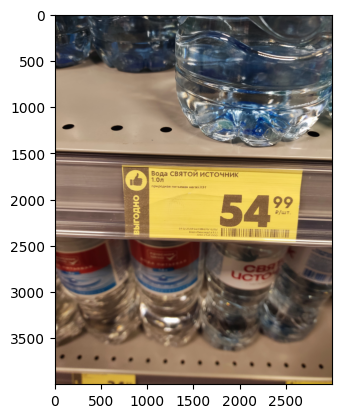

In [32]:
rotated_img = img.rotate(-90, expand=True)
plt.imshow(rotated_img)

In [43]:
resized_img = img.resize((512, 512))  # укажи нужный размер


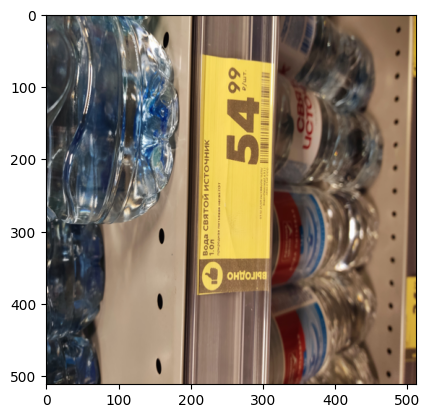

In [44]:
plt.imshow(resized_img)

In [39]:
model_name = "Qwen2_5-7b"


In [47]:
result_txt = qwen_processor.process(SYSTEM_PROMPT, USER_PROMPT, img, model_name )
print(result_txt)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 23.68 GiB of which 15.56 MiB is free. Process 43110 has 16.50 GiB memory in use. Process 43358 has 7.16 GiB memory in use. Of the allocated memory 6.89 GiB is allocated by PyTorch, and 1.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [48]:
!nvidia-smi

Fri Jun  6 09:40:19 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.216.03             Driver Version: 535.216.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               Off | 00000000:00:06.0 Off |                  Off |
| 30%   27C    P8               9W / 230W |  24232MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
